<a href="https://colab.research.google.com/github/arecracer/ai_training/blob/main/ai_trainer2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil
from google.colab import files

# Define the source directory (folder) you want to zip
source_dir = "/content/Data"

# Define the name of the zip file you want to create
zip_filename = "/content/ZipData.zip"

# Zip the folder
shutil.make_archive(zip_filename.split(".")[0], 'zip', source_dir)

# Provide a download link for the zip file
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip /content/Data -d /content/Data

In [ ]:
import zipfile

# Define the path to the zip file you want to extract
zip_filename = "/content/Data.zip"

# Define the directory where you want to extract the contents
extract_path = "/content/Data"

# Create the extraction directory if it doesn't exist
import os
os.makedirs(extract_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the contents of the extraction directory
extracted_files = os.listdir(extract_path)
print("Extracted files and directories:")
print(extracted_files)

# Main


In [ ]:
# !pip install wget
# import wget

In [ ]:
shutil.rmtree("/content/Data")

In [ ]:
# shutil.rmtree("/content/Data/images/valid/nekoma_hikaru")

In [ ]:
import sys, os, requests, shutil
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
print("Starting...")

def scrape(tag,max_page,start_page,folder):
    print("scraping...")
    MAX_PAGE_SEARCH = max_page
    page = start_page

    for ctr in range(1, MAX_PAGE_SEARCH + 1):

        if tag == 'Draw':
          req = Request('https://danbooru.donmai.us/posts?page=' + str(page))
        else:
          req = Request('https://danbooru.donmai.us/posts?page=' + str(page) +
                      '&tags=' + space_to_underscore(tag), headers={'User-Agent': 'Mozilla/5.0'})

        webpage = urlopen(req).read()

        spage = soup(webpage, "html.parser")
        images = spage.findAll("article")
        print("(Found " + str(len(images)) + " images)")

        folder_path = os.path.join("/content/Data/images/"+folder, tag)
        # folder_path = os.path.join("/content/Data/images/"+folder, "Draw")

        os.makedirs(folder_path, exist_ok=True)

        print('downloading images...')

        for image in images:
            print(image.img['src'])
            image_url = image.img['src']
            r = requests.get(image_url, stream=True, headers={'User-agent': 'Mozilla/5.0'})

            if r.status_code == 200:
                filename = os.path.join(folder_path, image_url.split('/')[-1])
                print(filename)

                with open(filename, 'wb') as f:
                    r.raw.decode_content = True
                    shutil.copyfileobj(r.raw, f)
        page += 1

def space_to_underscore(string_):
    return "_".join(string_.split())

Starting...


In [ ]:
from google.colab import files
files.download('Data')

In [ ]:
# scrape('Draw',1,21,"test")
# scrape('Draw',20,22,"train")
# scrape('Draw',2,11,"valid")
data = ["mika_pikazo","lack","shirabi","chigusa_minori","qqqrinkappp","aono3","criis-chan","komatsu eiji","kukie-nyan","konbu_wakame","donguri_suzume","modare","scottie_(phantom2)","xiujia_yihuizi","chigusa_minori","fujima_takuya","jonsun","komone_ushio","qys3","efe","ririko_(zhuoyandesailaer)","apple_caramel"]
for i in data:
  scrape(i,1,2,"train")
  scrape(i,1,3,"test")

/content/Data/images/train/Draw/5ab255b49d14cafb87c31166e4d95752.jpg
https://cdn.donmai.us/180x180/a9/4f/a94f5c352ec76edba9f54bb9bf28e1d1.jpg
/content/Data/images/train/Draw/a94f5c352ec76edba9f54bb9bf28e1d1.jpg
https://cdn.donmai.us/180x180/c1/d0/c1d05882abf3364b7dacc254f056a03c.jpg


KeyboardInterrupt: ignored

In [ ]:
for j in range(1, 14, 3):
      print(j)

1
4
7
10
13


In [ ]:
# data = ["mika_pikazo","lack","shirabi","chigusa_minori","qqqrinkappp","aono3","criis-chan","komatsu eiji","kukie-nyan","konbu_wakame","donguri_suzume","modare","scottie_(phantom2)","xiujia_yihuizi","chigusa_minori"]
# data = ["mika_pikazo","lack","shirabi","chigusa_minori","qqqrinkappp"]
# data = ["aono3","criis-chan","komatsu eiji","kukie-nyan","konbu_wakame"]
# data = ["donguri_suzume","modare","scottie_(phantom2)","xiujia_yihuizi","chigusa_minori"]
# data = ["fujima_takuya","komorihikki","jonsun"]
# data = ["komone_ushio","qys3","efe","ririko_(zhuoyandesailaer)","apple_caramel"]

data = ["mika_pikazo","lack","shirabi","chigusa_minori","qqqrinkappp","aono3","criis-chan","komatsu eiji","kukie-nyan","konbu_wakame","donguri_suzume","modare","scottie_(phantom2)","xiujia_yihuizi","chigusa_minori","fujima_takuya","jonsun","komone_ushio","qys3","efe","ririko_(zhuoyandesailaer)","apple_caramel"]

for i in data:
  for j in range(1, 14, 3):
      scrape(i,1,j,"test")
  for j in range(2, 15, 3):
      scrape(i,1,j,"valid")
  for j in range(2, 16, 3):
      scrape(i,1,j,"train")

  scrape(i,15,13,"train")

  # scrape(i,10,6,"train")
  # scrape(i,4,2,"valid")


/content/Data/images/test/qys3/86f2369a9256cb60a0661f3d59e8818f.jpg
https://cdn.donmai.us/180x180/26/4d/264d5f770b72c7fe51637549bbb87ffb.jpg
/content/Data/images/test/qys3/264d5f770b72c7fe51637549bbb87ffb.jpg
https://cdn.donmai.us/180x180/b0/5f/b05f5c4dc11a3f5208e8288b387f3af6.jpg
/content/Data/images/test/qys3/b05f5c4dc11a3f5208e8288b387f3af6.jpg
https://cdn.donmai.us/180x180/6a/48/6a483d5e60d04917c358e68e41467af5.jpg
/content/Data/images/test/qys3/6a483d5e60d04917c358e68e41467af5.jpg
https://cdn.donmai.us/180x180/75/3d/753d07adedbf33e81119130bb6e0f81c.jpg
/content/Data/images/test/qys3/753d07adedbf33e81119130bb6e0f81c.jpg
https://cdn.donmai.us/180x180/3b/d3/3bd314b1f79777f64f862929d4df3ce2.jpg
/content/Data/images/test/qys3/3bd314b1f79777f64f862929d4df3ce2.jpg
https://cdn.donmai.us/180x180/5a/34/5a34ce6fed2a131061817b4bc8bf05bb.jpg
/content/Data/images/test/qys3/5a34ce6fed2a131061817b4bc8bf05bb.jpg
https://cdn.donmai.us/180x180/98/b8/98b8561c866e8a910cbee95b0bd82485.jpg
/content/Data

In [ ]:
!pip install -q fastbook==0.0.29
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.4 MB/s eta 0:00:00


In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(valid_name='valid'),
    get_y=parent_label,
    batch_tfms=aug_transforms(size=250),
    item_tfms=Resize(250)
)
dls = dblock.dataloaders('Data/images/', bs=50)

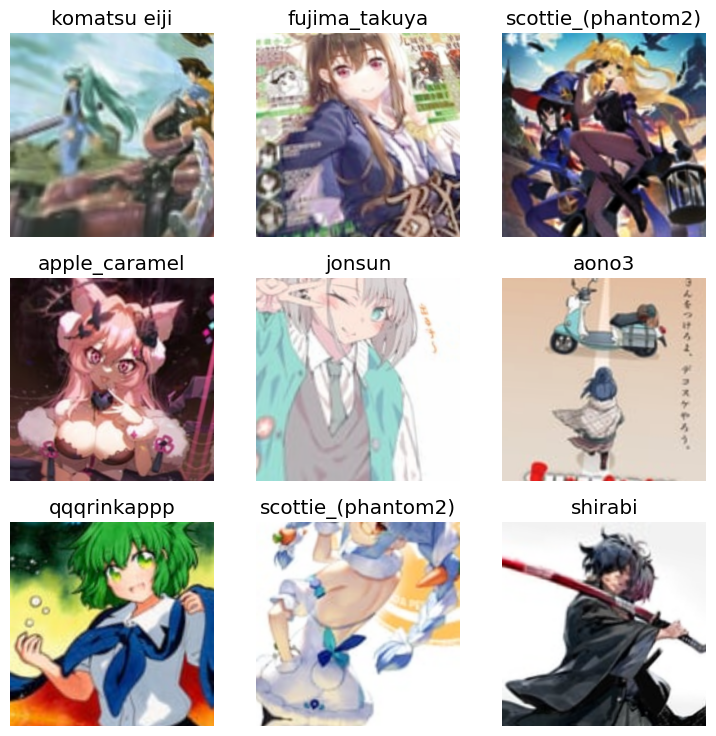

In [ ]:
dls.train.show_batch(max_n=9,nrows=3) #180

In [ ]:
dls.train.show_batch(max_n=9,nrows=3) #512

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(epochs=40, freeze_epochs=0, base_lr=2e-3)

In [ ]:
learn.show_results()

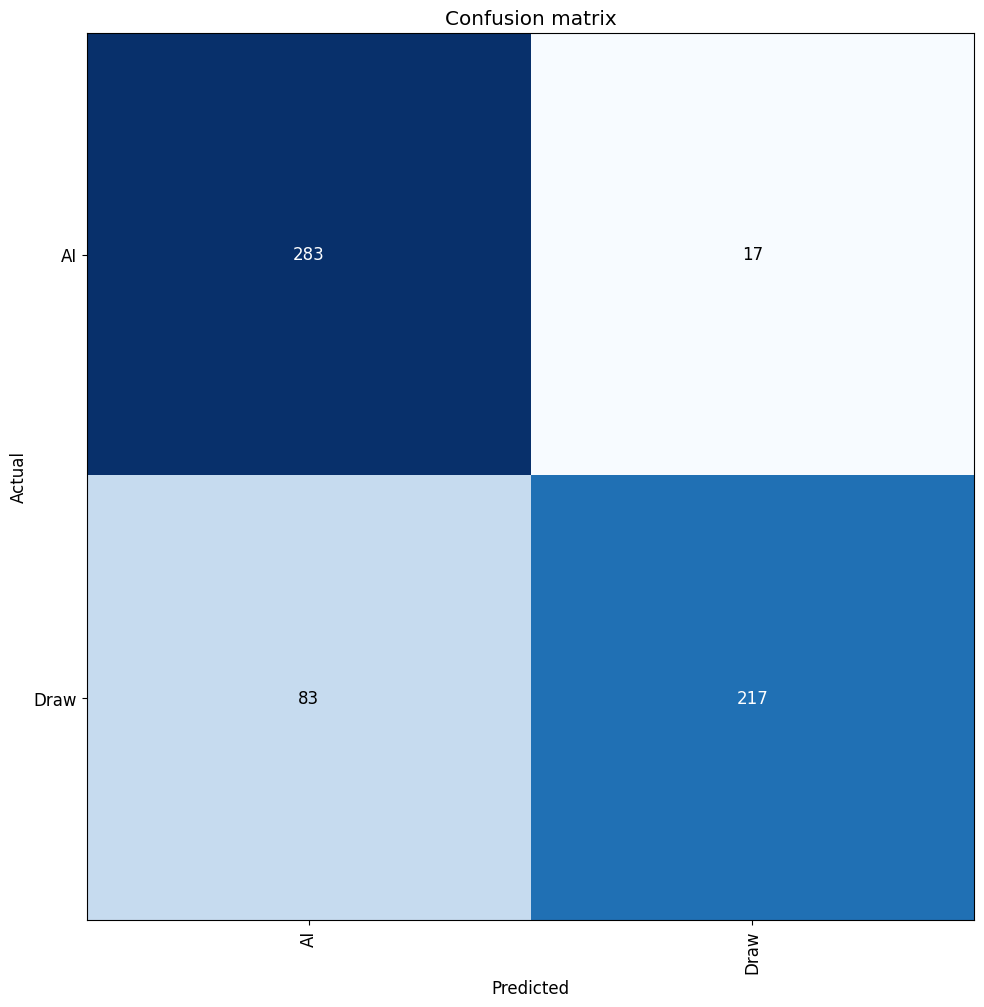

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

          AI       0.98      0.85      0.91       141
         all       0.87      0.99      0.93       146

    accuracy                           0.92       287
   macro avg       0.93      0.92      0.92       287
weighted avg       0.93      0.92      0.92       287



In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

In [ ]:
def upload_and_predict(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(512,512))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

# Create the file upload widget and output display
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

# Bind the upload_and_predict function to the button's observe event
btn_upload.observe(upload_and_predict, names=['data'])

# Display the widgets
display(btn_upload)
display(out_pl)
display(lbl_pred)

In [ ]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image

def upload_and_predict(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(512, 512))
    _, _, probs = learn_inf.predict(img)
    sorted_probs = sorted(zip(learn_inf.dls.vocab, map(float, probs)), key=lambda p: p[1], reverse=True)
    predictions_str = '; '.join(f'{label}: {prob:.5f}' for label, prob in sorted_probs)
    lbl_pred.value = f'Predictions: {predictions_str}'

btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

btn_upload.observe(upload_and_predict, names=['data'])

display(btn_upload)
display(out_pl)
display(lbl_pred)

FileUpload(value={}, description='Upload')

Output()

Label(value='')

In [ ]:
from google.colab import files

files.download('export.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
learn.export('model.onnx')

# Deploy


In [ ]:
!git clone https://huggingface.co/spaces/Bravefe/Artist_Classification

Cloning into 'Artist_Classification'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 69 (delta 35), reused 0 (delta 0), pack-reused 4
Unpacking objects: 100% (69/69), 6.93 KiB | 373.00 KiB/s, done.


In [ ]:
%cd Artist_Classification

/content/Artist_Classification/Artist_Classification


In [ ]:
!ls

app.py	README.md  requirementsl.txt


In [ ]:
!pip install -r requirementsl.txt -q

In [ ]:
# from huggingface_hub import nootbook_login
# notebook_login()

In [ ]:
# path = Path()
# path.ls(file_exts='.pkl')

learn_inf = load_learner('/content/ai_builder1.1.pkl')

In [ ]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 7.8 MB/s eta 0:00:00


In [ ]:
# %%writefile app.py

import gradio as gr
import os
import pickle


def greet(image):
    pred, pred_idx, probs = learn_inf.predict(image)
    txt = f'Prediction: {pred} Probability: {probs[pred_idx]:.04f}'
    # sorted_probs = sorted(zip(learn_inf.dls.vocab, map(float, probs)), key=lambda p: p[1], reverse=True)
    # predictions_str = '; '.join(f'{label}: {prob:.5f}' for label, prob in sorted_probs)
    return txt

# def greet(name):
#     return "Hello " + name + "!!"

iface = gr.Interface(fn=greet, inputs="image", outputs="label")
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7e42068d54c01cffd7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
!python app.py

Traceback (most recent call last):
  File "/content/Artist_Classification/Artist_Classification/app.py", line 9, in <module>
    learn_inf = load_learner("/content/export.pkl")
NameError: name 'load_learner' is not defined


# Next

In [ ]:
while True:
  time.sleep(5)
  print("hello")

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

# Load a pre-trained MobileNetV2 model (you can use other models too)
model = MobileNetV2(weights='imagenet')

# Function to predict if an image is AI-generated or not
def is_ai_generated(image_path, threshold=0.5):
    img = image.load_img(/content/Data/images/train, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)[0]

    # Assuming class index 0 is AI-generated, but you need to verify this
    ai_generated_prob = predictions[0, 0]

    return ai_generated_prob > threshold

# Test the function
image_path = 'path_to_your_image.jpg'
is_ai = is_ai_generated(image_path)

if is_ai:
    print("The image is AI-generated.")
else:
    print("The image is not AI-generated.")

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Replace 'source_path' with the actual path of the photo in Colab environment
source_path = '/content/Data/images/test/lack/176a221bc6d3209bf7bba422f963d5c3.jpg'
# Replace 'destination_path' with the desired path in your Google Drive
destination_path = '/content/drive/My Drive/176a221bc6d3209bf7bba422f963d5c3.jpg'

# Copy the file to Google Drive
shutil.copy(source_path, destination_path)

# from google.colab import files

# uploaded = files.upload()
# shutil.move(list(uploaded.keys())[0], '/content/drive/My Drive/176a221bc6d3209bf7bba422f963d5c3.jpg')

Saving hello.png to hello.png


'/content/drive/My Drive/176a221bc6d3209bf7bba422f963d5c3.jpg'